In [1]:
import pymongo
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium

## Cargar base datos

In [2]:
cliente = pymongo.MongoClient()

In [3]:
cliente.list_database_names()

['admin', 'companies_database', 'config', 'local', 'new_database']

In [4]:
db = cliente.companies_database
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies_database')

In [5]:
colec = db.companies
colec

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies_database'), 'companies')

Obtendré información sobre la ubicación de las oficinas, el nombre de la empresa, su categoría, su descripción, el año de fundación y el número de empleados que tiene

In [6]:
oficinas = colec.find({'offices':{'$not':{'$size':0}}},
                         {'name':True,'_id':0,'category_code':1,'founded_year':1,'description':1 ,'number_of_employees':1, 'offices':1})

In [7]:
si_oficinas = list(oficinas)
si_oficinas[:10]

[{'name': 'Wetpaint',
  'category_code': 'web',
  'number_of_employees': 47,
  'founded_year': 2005,
  'description': 'Technology Platform Company',
  'offices': [{'description': '',
    'address1': '710 - 2nd Avenue',
    'address2': 'Suite 1100',
    'zip_code': '98104',
    'city': 'Seattle',
    'state_code': 'WA',
    'country_code': 'USA',
    'latitude': 47.603122,
    'longitude': -122.333253},
   {'description': '',
    'address1': '270 Lafayette Street',
    'address2': 'Suite 505',
    'zip_code': '10012',
    'city': 'New York',
    'state_code': 'NY',
    'country_code': 'USA',
    'latitude': 40.7237306,
    'longitude': -73.9964312}]},
 {'name': 'AdventNet',
  'category_code': 'enterprise',
  'number_of_employees': 600,
  'founded_year': 1996,
  'description': 'Server Management Software',
  'offices': [{'description': 'Headquarters',
    'address1': '4900 Hopyard Rd.',
    'address2': 'Suite 310',
    'zip_code': '94588',
    'city': 'Pleasanton',
    'state_code': 'CA'

In [8]:
df = pd.DataFrame(si_oficinas)
df

,name,category_code,number_of_employees,founded_year,description,offices
0,Wetpaint,web,47.0,2005.0,Technology Platform Company,"[{'description': '', 'address1': '710 - 2nd Av..."
1,AdventNet,enterprise,600.0,1996.0,Server Management Software,"[{'description': 'Headquarters', 'address1': '..."
2,Zoho,software,1600.0,2005.0,Online Business Apps Suite,"[{'description': 'Headquarters', 'address1': '..."
3,Digg,news,60.0,2004.0,user driven social content website,"[{'description': None, 'address1': '135 Missis..."
4,Facebook,social,5299.0,2004.0,Social network,"[{'description': 'Headquarters', 'address1': '..."
...,...,...,...,...,...,...
13739,Oriact,software,NaN,2009.0,Solutions for software development,"[{'description': '', 'address1': 'LÃ¤rchenweg ..."
13740,Adhunk,advertising,3.0,2009.0,Online Admanager,"[{'description': 'Indian Office', 'address1': ..."
13741,AfterLogic,software,NaN,2002.0,.NET Email Components and Webmail,"[{'description': 'Livingston', 'address1': 'P...."
13742,EnteGreat Solutions,software,NaN,NaN,,"[{'description': '', 'address1': '', 'address2..."


In [9]:
lista_direcciones = [json_normalize(i) for i in df['offices']]

<ipython-input-9-30f68f3512ab>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  lista_direcciones = [json_normalize(i) for i in df['offices']]


In [10]:
lista_nombres = list(df['name'])
lista_cc=list(df['category_code'])
lista_ne=list(df['number_of_employees'])
lista_fy=list(df['founded_year'])

In [11]:
print(len(lista_nombres), len(lista_direcciones))

13744 13744


In [12]:
zip_nombre_df = list(zip(lista_nombres,lista_direcciones))

In [13]:
for i in zip_nombre_df:
    i[1]['name'] = i[0]

In [14]:
concat_df = pd.DataFrame()
for i in range(len(zip_nombre_df)):
    concat_df = pd.concat([concat_df,zip_nombre_df[i][1]])

In [15]:
df_co=pd.merge(df, concat_df, on='name')

In [16]:
df_co[:10]

,name,category_code,number_of_employees,founded_year,description_x,offices,description_y,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,Wetpaint,web,47.0,2005.0,Technology Platform Company,"[{'description': '', 'address1': '710 - 2nd Av...",,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
1,Wetpaint,web,47.0,2005.0,Technology Platform Company,"[{'description': '', 'address1': '710 - 2nd Av...",,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431
2,AdventNet,enterprise,600.0,1996.0,Server Management Software,"[{'description': 'Headquarters', 'address1': '...",Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
3,Zoho,software,1600.0,2005.0,Online Business Apps Suite,"[{'description': 'Headquarters', 'address1': '...",Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
4,Digg,news,60.0,2004.0,user driven social content website,"[{'description': None, 'address1': '135 Missis...",None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523
5,Facebook,social,5299.0,2004.0,Social network,"[{'description': 'Headquarters', 'address1': '...",Headquarters,1601 Willow Road,,94025,Menlo Park,CA,USA,37.416050,-122.151801
6,Facebook,social,5299.0,2004.0,Social network,"[{'description': 'Headquarters', 'address1': '...",Europe HQ,,,,Dublin,None,IRL,53.344104,-6.267494
7,Facebook,social,5299.0,2004.0,Social network,"[{'description': 'Headquarters', 'address1': '...",New York,340 Madison Ave,,10017,New York,NY,USA,40.755716,-73.979247
8,Omnidrive,network_hosting,NaN,2005.0,None,"[{'description': '', 'address1': 'Suite 200', ...",,Suite 200,654 High Street,94301,Palo Alto,CA,ISR,NaN,NaN
9,Postini,web,NaN,1999.0,None,"[{'description': None, 'address1': '959 Skyway...",None,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.506885,-122.247573


## Limpiando datos

In [17]:
df=df_co.copy()

In [18]:
df.dtypes #Se notan correctas, se modificarán nombres de columnas

name                    object
category_code           object
number_of_employees    float64
founded_year           float64
description_x           object
offices                 object
description_y           object
address1                object
address2                object
zip_code                object
city                    object
state_code              object
country_code            object
latitude               float64
longitude              float64
dtype: object

## Explorando los datos y filtrando por preferencia personal

In [19]:
df['category_code'].unique()

array(['web', 'enterprise', 'software', 'news', 'social',
       'network_hosting', 'games_video', 'music', 'mobile', 'search',
       'advertising', 'messaging', 'security', 'photo_video', 'finance',
       'hardware', 'ecommerce', 'travel', 'public_relations', 'other',
       'real_estate', 'semiconductor', 'analytics', 'health', 'legal',
       'sports', 'biotech', 'cleantech', 'education', 'consulting',
       'transportation', 'hospitality', 'fashion', 'nonprofit',
       'nanotech', 'automotive', None, 'design', 'manufacturing',
       'government', 'local', 'medical'], dtype=object)

In [21]:
df_ms = [df['category_code']=='hospitality']

In [22]:
df_ms=df[df['founded_year']>2005][df['number_of_employees']<200] #preferencia personal por empresas nuevas y con pocos empleados

<ipython-input-22-a9148e9c83ba>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms=df[df['founded_year']>2005][df['number_of_employees']<200] #preferencia personal por empresas nuevas y con pocos empleados


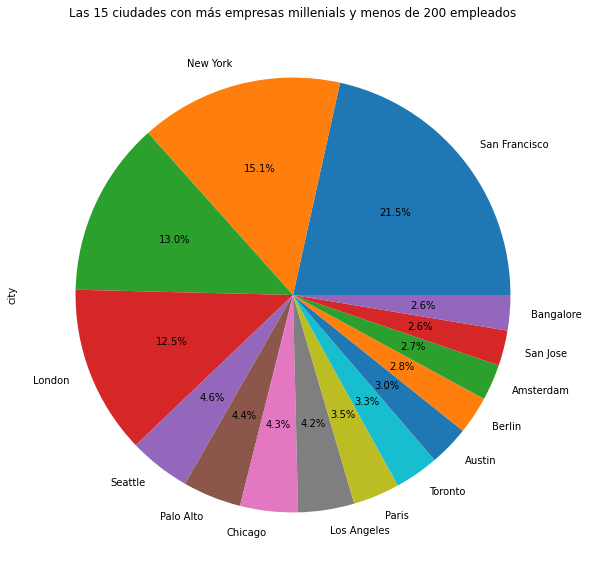

In [23]:
df_ms['city'].value_counts()[:15].plot.pie(y='number', figsize=(20,10),autopct='%1.1f%%')
plt.title('Las 15 ciudades con más empresas millenials y menos de 200 empleados');

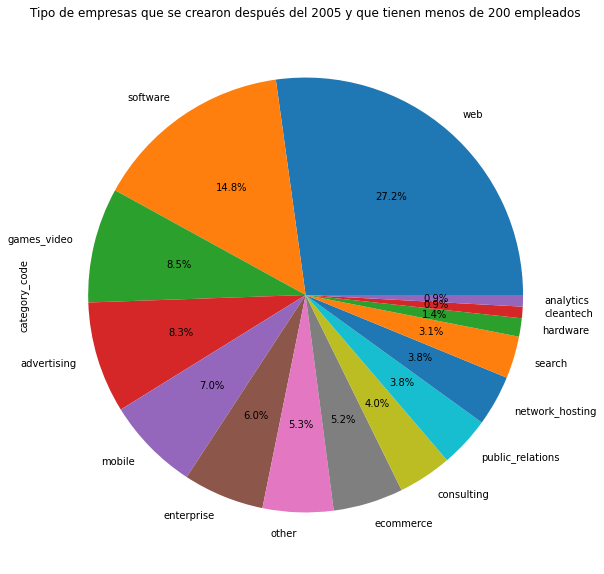

In [24]:
df_ms['category_code'].value_counts()[:15].plot.pie(y='number', figsize=(20,10),autopct='%1.1f%%')
plt.title('Tipo de empresas que se crearon después del 2005 y que tienen menos de 200 empleados');

### Buscando el comportamiento a través del tiempo por ciudades y categoría

In [25]:
cities=['San Francisco', 'New York', 'London', 'Los Angeles','Amsterdam', 'Berlin' ]

In [26]:
categories= ['web', 'nonprofit', 'analytics', 'ecommerce', 'consulting', 'travel', 'finance', 'real_estate','education']

In [27]:
def city_category(city, cat):
    df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
    plt.title(f'Empresas {cat} creadas en diversas ciudades');

<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to matc

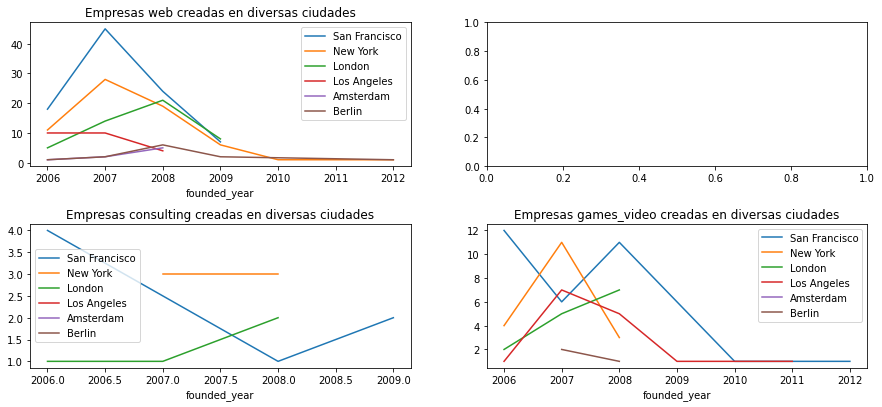

In [29]:
plt.figure(figsize = (15,10))
plt.subplots_adjust( hspace=0.4, bottom=0.4)
plt.subplot(2,2,1)
for i in cities:
    city_category(i, 'web')
    plt.legend(cities);
plt.subplot(2,2,2)

plt.subplot(2,2,3)
for i in cities:
    city_category(i, 'consulting')
    plt.legend(cities); 
plt.subplot(2,2,4)
for i in cities:
    city_category(i, 'games_video')
    plt.legend(cities); 

Se observa que en las categorías seleccionadas San Francisco es la que presenta más actividad, seguida por New York

### Enfocandonos en ecommerce

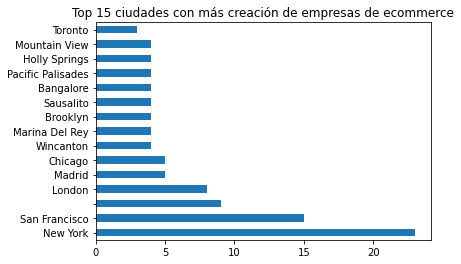

In [30]:
df_ms[df_ms['category_code']=='ecommerce']['city'].value_counts()[:15].plot(kind='barh')
plt.title('Top 15 ciudades con más creación de empresas de ecommerce');

In [31]:
df_ms[df_ms['category_code']=='ecommerce']['city'].value_counts()[:15]

New York             23
San Francisco        15
                      9
London                8
Madrid                5
Chicago               5
Wincanton             4
Marina Del Rey        4
Brooklyn              4
Sausalito             4
Bangalore             4
Pacific Palisades     4
Holly Springs         4
Mountain View         4
Toronto               3
Name: city, dtype: int64

### Enfocandonos en ecommerce a lo largo del tiempo

In [32]:
cities= ['New York', 'London', 'Madrid', 'Chicago', 'Brooklyn', 'Berlin']

<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ms[df_ms['category_code']==f'{cat}'][df_ms['city']== f'{city}'].groupby('founded_year')['name'].count().plot()
<ipython-input-27-df1936d70ac3>:2: UserWarning: Boolean Series key will be reindexed to matc

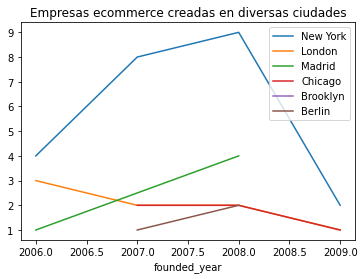

In [33]:
for i in cities:
    city_category(i, 'ecommerce')
    plt.legend(cities);

### Enfocandonos en Madrid

In [34]:
df_mad=df_ms[df_ms['city']=='Madrid']

In [35]:
loc= list(zip(df_mad['latitude'], df_mad['longitude'])) #formando tuplas 

In [36]:
loc

[(40.530724, -3.632687),
 (40.43094, -3.6952896),
 (nan, nan),
 (40.5288449, -3.6429907),
 (40.382338, -3.773844),
 (nan, nan),
 (40.4596242, -3.6923285),
 (40.416741, -3.70325),
 (40.42046, -3.678121),
 (40.412323, -3.703248),
 (40.412323, -3.703248),
 (40.412323, -3.703248),
 (40.412323, -3.703248),
 (nan, nan),
 (40.4367771, -3.6685036),
 (40.4225487, -3.6830316),
 (40.4380872, -3.6760635),
 (nan, nan),
 (40.6070897, -3.6912754),
 (nan, nan),
 (40.4905109, -3.7033403),
 (40.4158236, -3.696277),
 (40.4346935, -3.6782829),
 (40.4165967, -3.6992667),
 (40.6367104, -3.9980485),
 (40.4226918, -3.6883074),
 (40.4244585, -3.6990948)]

In [37]:
for i in range(len(loc)):
    try:
        folium.Marker([loc[i][0], loc[i][1]], icon=folium.Icon(color='red'),popup = '<b>Empresas con menos de 200 empleados creadas despues del 2005</b>', tooltip = 'tooltip').add_to(mapa2)
    except:
        pass
mapa2

NameError: name 'mapa2' is not defined

## Top 10 global consumer trends in 2020 are:

In [38]:
import requests
from bs4 import BeautifulSoup

In [39]:
url= 'https://blog.euromonitor.com/top-10-global-consumer-trends-in-2020-revealed-by-euromonitor/'
req = requests.get(url)
req

<Response [200]>

In [40]:
sopa = BeautifulSoup(req.content, 'html.parser')

In [41]:
p=sopa.find_all('p')

In [42]:
p_text= [i.text for i in p ]

In [43]:
p_text[4:6]

['According to Euromonitor International, the top 10 global consumer trends in 2020 are:',
 '• Beyond Human: Embracing artificial intelligence for automation and convenience. • Catch Me in Seconds: Seeking quick, concise and multisensory content for instant gratification. • Frictionless Mobility: Choosing transportation methods based on individual preferences for a seamless travel journey. • Inclusive for All: Focusing on diversity and accessibility for everyone. • Minding Myself: Prioritizing mental health and searching for products positioned to address specific well-being needs. • Multifunctional Homes: Doing everything from the comfort of home. • Private Personalization: Balancing the desire for optimized experiences with concerns about sharing personal data. • Proudly Local, Going Global: Valuing home culture and products tailored to local tastes and preferences. • Reuse Revolutionaries: Finding alternatives to single-use products to reduce environmental footprint and waste. • We 

In [44]:
for i in range(len(p_text)):
    p_text[i]=p_text[i].replace('\n','  ')